# Exploratory Data Analysis (EDA)

In this section we are going to explore the most significant characteristics of the dataset before any manipulation.

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
data_red = pd.read_csv("../data/winequality-red.csv", sep=";")
data_white = pd.read_csv("../data/winequality-white.csv", sep=";")

# Add a column to distinguish the wine type
data_red["type"] = "red"
data_white["type"] = "white"

# Combine both datasets
data = pd.concat([data_red, data_white], ignore_index=True)

In [42]:
# Binary classification target
data["quality_binary"] = (data["quality"] >= 6).astype(int)

In [43]:
# Basic Info
print("🔍 Dataset shape:", data_red.shape)
print("🔍 Dataset shape:", data_white.shape)
print("🔍 Dataset shape:", data.shape)
print("🔍 Columns:", data.columns.tolist())
print("\n🧾 Data sample:\n", data.head())
print("\n📊 Class distribution:\n", data["quality_binary"].value_counts(normalize=True))

# ========== Missing Values ========== #
print("\n🧼 Missing values per column:\n", data.isnull().sum())

# ========== Descriptive Statistics ========== #
print("\n📈 Descriptive statistics:\n", data.describe())

🔍 Dataset shape: (1599, 13)
🔍 Dataset shape: (4898, 13)
🔍 Dataset shape: (6497, 14)
🔍 Columns: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'type', 'quality_binary']

🧾 Data sample:
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20   

# Data Visualization

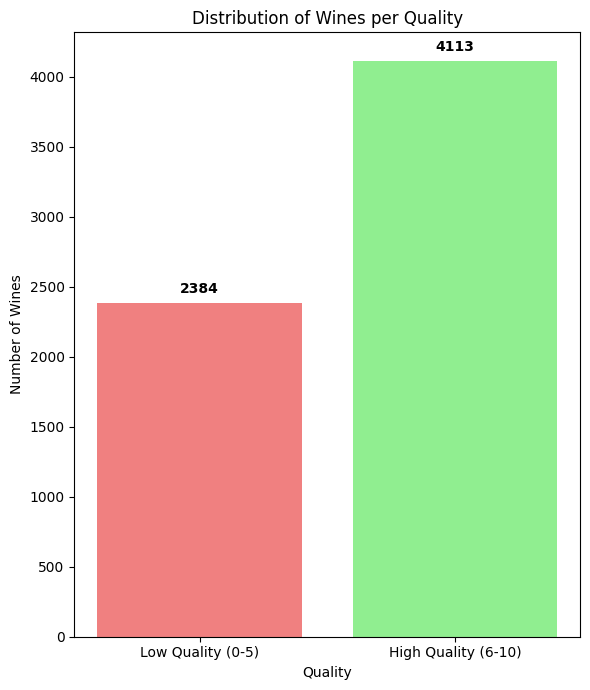

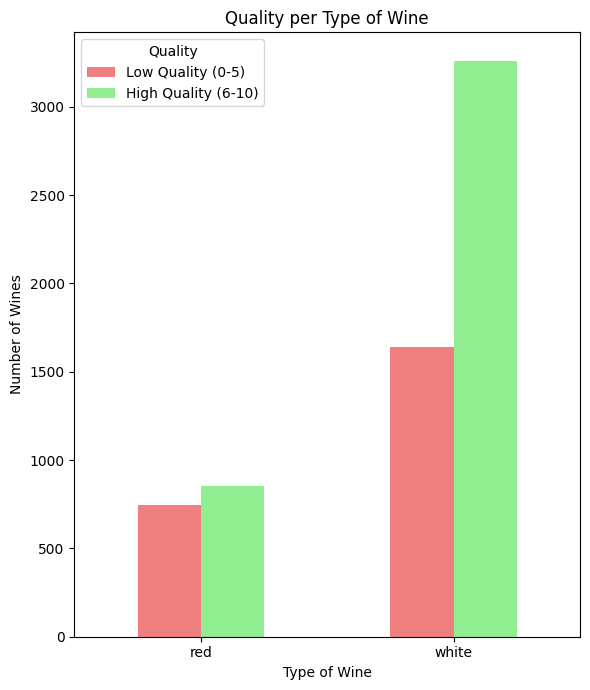

📊 Distribution of Quality:
Low Quality Wines (0-5): 2384 (36.7%)
High Quality Wines (6-10): 4113 (63.3%)

📊 Distribution per Type of Wines:

Red wines:
 Low Quality: 744 (46.5%)
 High Quality : 855 (53.5%)

White wines:
 Low Quality: 1640 (33.5%)
 High Quality : 3258 (66.5%)


In [44]:
# Quality distribution
plt.figure(figsize=(6, 7))

quality_counts = data["quality_binary"].value_counts().reindex([0, 1])
labels = ["Low Quality (0-5)", "High Quality (6-10)"]
colors = ['lightcoral', 'lightgreen']

plt.bar(range(len(quality_counts)), quality_counts.values, color=colors)
plt.xlabel("Quality")
plt.ylabel("Number of Wines")
plt.title("Distribution of Wines per Quality")
plt.xticks(range(len(quality_counts)), labels)

for i, v in enumerate(quality_counts.values):
    plt.text(i, v + 50, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig("eda_plots/quality_distribution_histogram.png")
plt.show()

plt.figure(figsize=(6, 7))
quality_by_type = data.groupby(['type', 'quality_binary']).size().unstack()

quality_by_type.plot(kind='bar', color=colors, ax=plt.gca())
plt.xlabel("Type of Wine")
plt.ylabel("Number of Wines")
plt.title("Quality per Type of Wine")
plt.legend(labels, title="Quality")
plt.xticks(rotation=0)

plt.tight_layout()
plt.savefig("eda_plots/quality_distribution_histogram2.png")
plt.show()

# Stampa statistiche dettagliate
print("📊 Distribution of Quality:")
print(f"Low Quality Wines (0-5): {quality_counts[0]} ({quality_counts[0]/len(data)*100:.1f}%)")
print(f"High Quality Wines (6-10): {quality_counts[1]} ({quality_counts[1]/len(data)*100:.1f}%)")

print("\n📊 Distribution per Type of Wines:")
for wine_type in ['red', 'white']:
    type_data = data[data['type'] == wine_type]
    type_counts = type_data['quality_binary'].value_counts()
    print(f"\n{wine_type.capitalize()} wines:")
    print(f" Low Quality: {type_counts[0]} ({type_counts[0]/len(type_data)*100:.1f}%)")
    print(f" High Quality : {type_counts[1]} ({type_counts[1]/len(type_data)*100:.1f}%)")

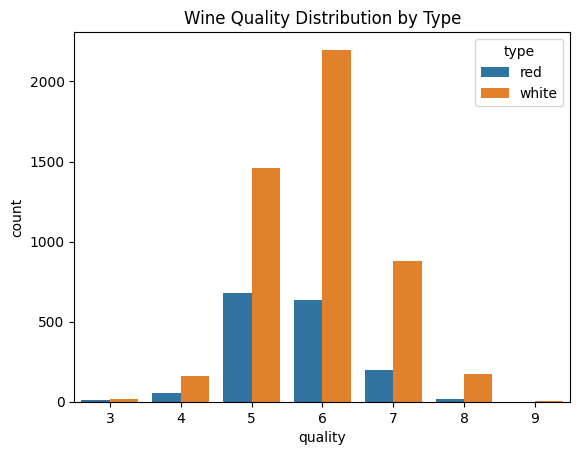

<Figure size 640x480 with 0 Axes>

In [45]:
# Quality distribution
sns.countplot(x="quality", data=data, hue="type")
plt.title("Wine Quality Distribution by Type")
plt.savefig("eda_plots/quality_distribution.png")
plt.show()
plt.clf()

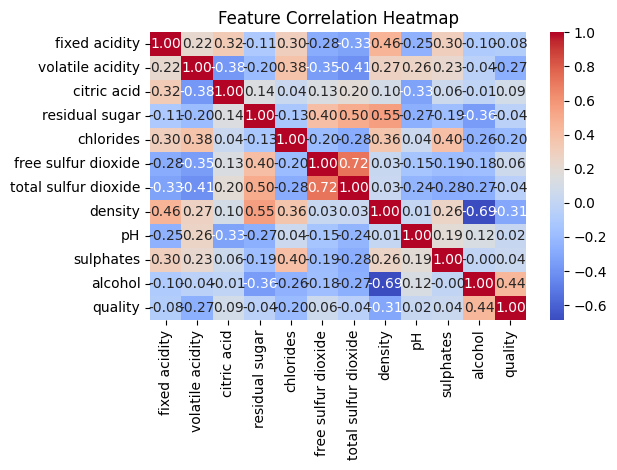

<Figure size 640x480 with 0 Axes>

In [46]:
# Correlation heatmap
corr = data.drop(columns=["quality_binary", "type"]).corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.savefig("eda_plots/correlation_heatmap.png")
plt.show()
plt.clf()

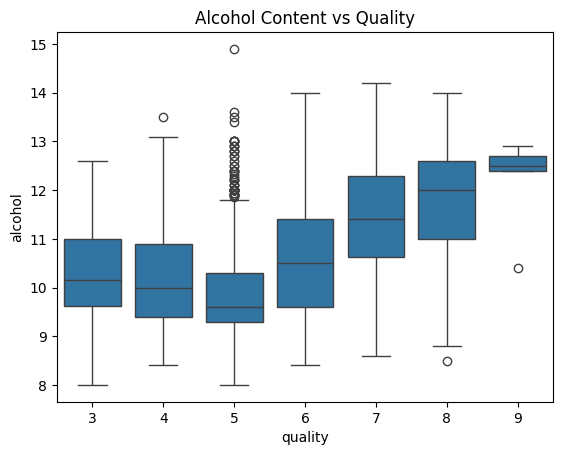

<Figure size 640x480 with 0 Axes>

In [47]:
# Alcohol vs Quality
sns.boxplot(x="quality", y="alcohol", data=data)
plt.title("Alcohol Content vs Quality")
plt.savefig("eda_plots/alcohol_vs_quality.png")
plt.show()
plt.clf()

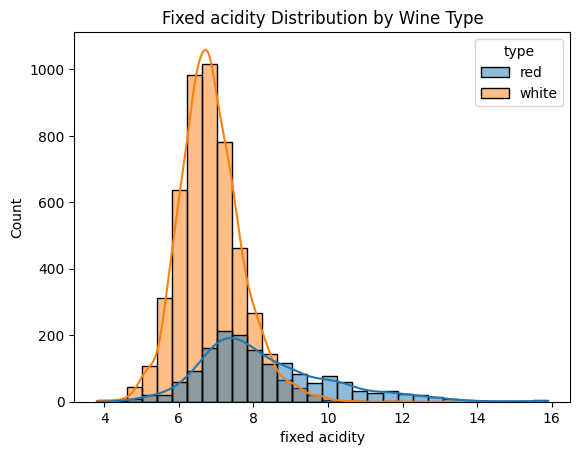

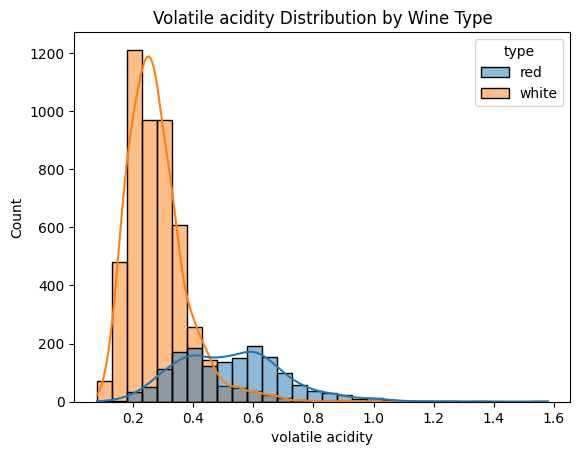

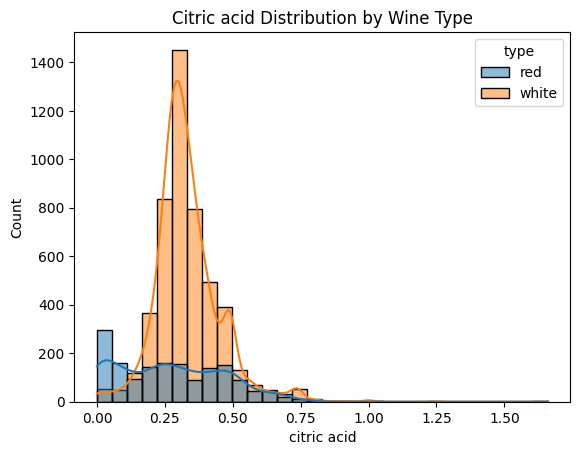

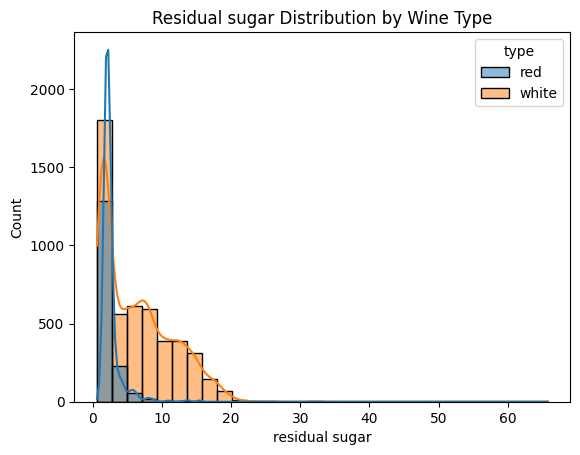

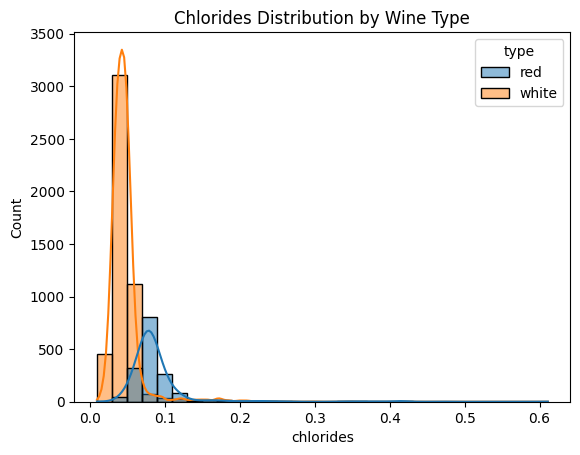

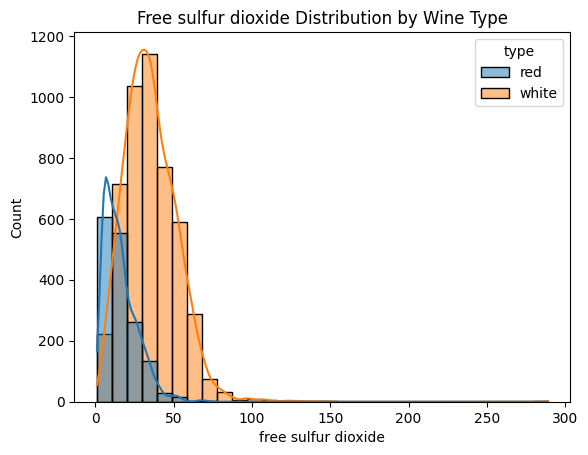

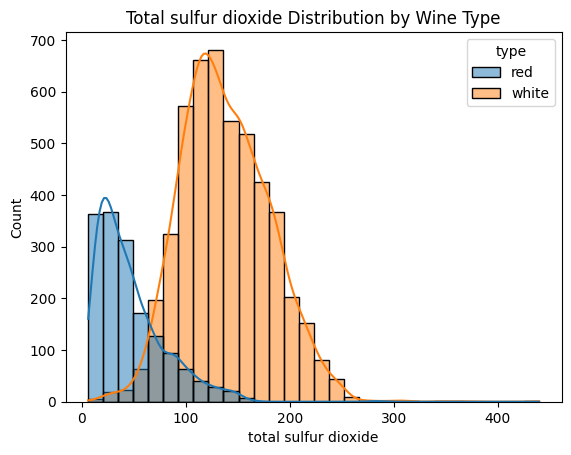

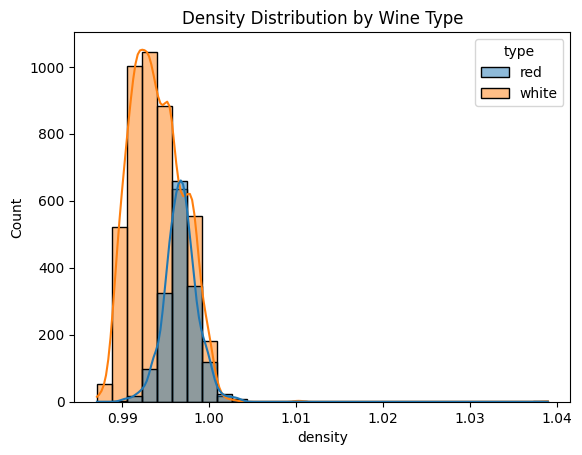

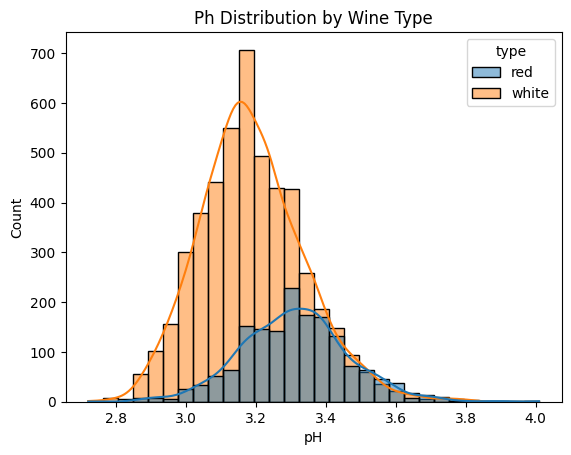

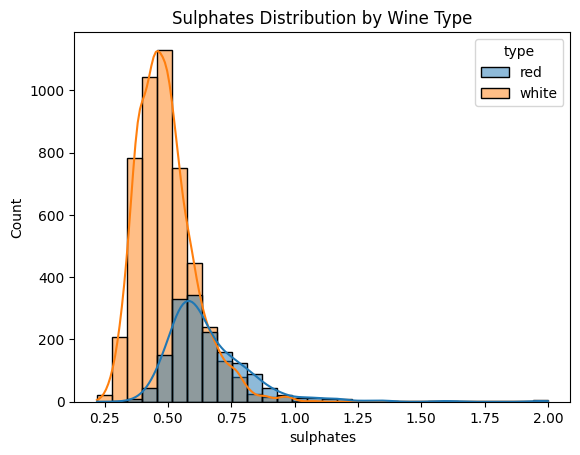

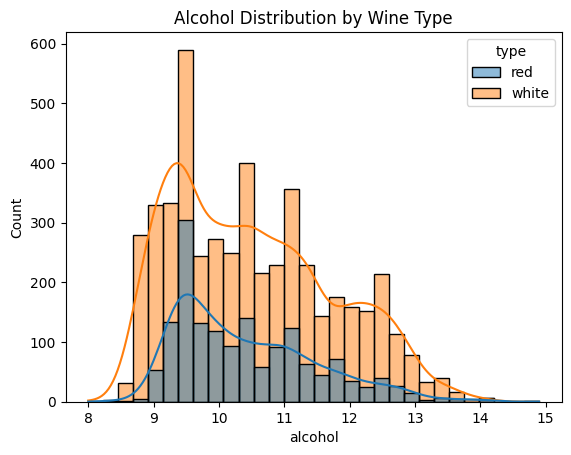

<Figure size 640x480 with 0 Axes>

In [48]:
# Distribution of features
features = data.columns[:-3]  # exclude 'quality', 'type', 'quality_binary'
for col in features:
    sns.histplot(data, x=col, hue="type", kde=True, bins=30)
    plt.title(f"{col.capitalize()} Distribution by Wine Type")
    plt.savefig(f"eda_plots/{col}_distribution.png")
    plt.show()
    plt.clf()

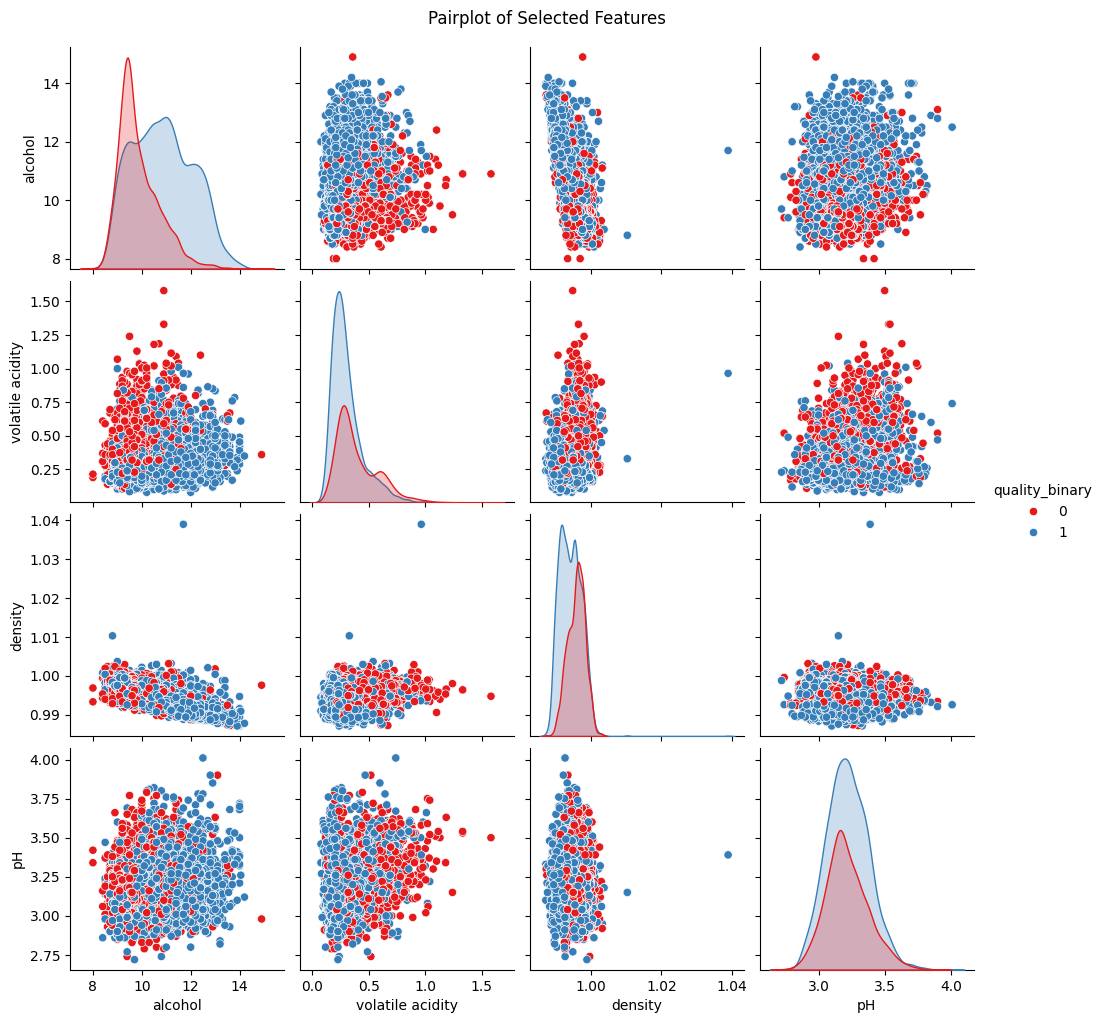

<Figure size 640x480 with 0 Axes>

In [49]:
# Pairplot of selected features
selected = ["alcohol", "volatile acidity", "density", "pH", "quality_binary"]
sns.pairplot(data[selected + ["type"]], hue="quality_binary", palette="Set1", diag_kind="kde")
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.savefig("eda_plots/pairplot_selected.png")
plt.show()
plt.clf()